# Vienna public transport
### Deleja-Hotko Julian, Topor Karol

## Concept
The aim of this project is to analyse disruptions in the Viennese public transport grid in relation to the local weather conditions.

To do this, we use historic data on disruptions in the public transit system in Vienna​, and combine it with historic weather data and geographic information, to see if we can see any patterns from it.

## Infrastructure

### Infrastructure Description

The architecture for data processing and visualization in this project includes the following components:

- `producer_delays`: A custom web scraper implemented in Python using BeautifulSoup to collect data on public transport delays from [öffi.at website](https://öffi.at/?archive=1&text=&types=2%2C3&page=).
- `producer_weather`: A custom API scraper, also in Python, that retrieves weather data from the openmeteo API.
- `Kafka`: Functions as the central messaging bus that transports events, which in this context are the delays and weather data.
- `consumer_00`: A custom Python consumer that processes the data from Kafka.
- `Postgres`: The database utilized for persisting the collected data.
- `Grafana`: The tool used for visualizing the data that has been stored in the Postgres database.

Each of these components plays a critical role in the pipeline from data collection to visualization.

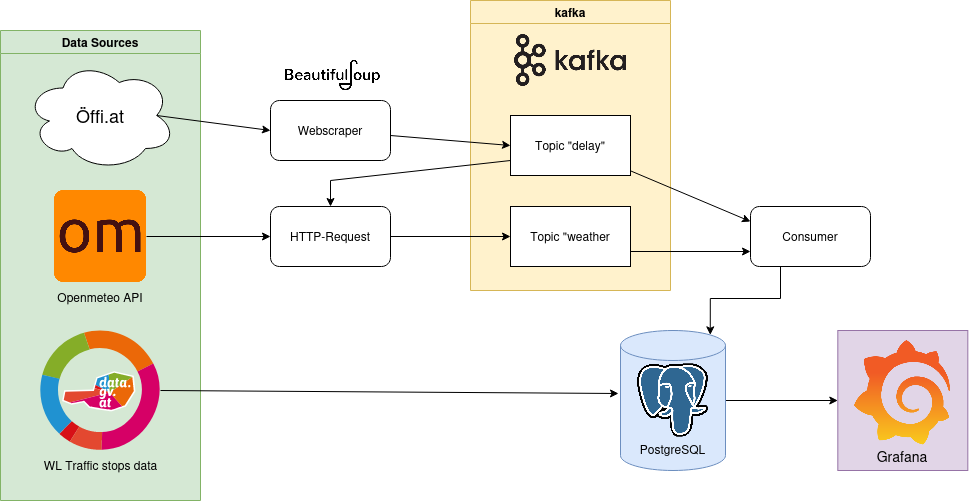

## Data Sources
 - [Öffi.at:](https://öffi.at/?archive=1&text=&types=2%2C3&page=​) Web-based historic archive of disruptions in the public transit system​
 - [Openmeteo:](https://open-meteo.com/) API for real-time and historic weather data​
 - [data.gv.at:](https://www.data.gv.at/katalog/dataset/21fca925-12ac-4215-ba1a-a9c73cb3b082) publicly available datasets from Austrian open government data ​

## Data Processing Pipeline

This pipeline details the process for analyzing how weather impacts public transport disruptions in Vienna:

### Data Collection:
- **Producer for Delays (`producer_delays`):**
  
   1. Starts the data collection by scraping the [öffi.at website](https://öffi.at/?archive=1&text=&types=2%2C3&page=) for public transport delay details.
   2. Filters the acquired HTML content for relevant information and sends the data to the Kafka system.

- **Producer for Weather (`producer_weather`):**
  
   3. Monitors the `topic_delays` in Kafka for new public transport interruption events.
   4. Upon detecting new events, it extracts the date and time details.
   5. Uses these details to retrieve corresponding weather conditions from the openmeteo API.
   6. Parses the received weather data and forwards it to Kafka.

### Data Consumption:
- **Consumer (`consumer_00`):**
  
   7. Connects to Kafka topics, ingests the interruption and weather data streams, and processes them for subsequent storage.

### Data Storage:
- **PostgreSQL Database (`Postgres`):**
  
   8. Receives the processed data and serves as the permanent storage solution, ensuring data integrity and accessibility.

### Data Visualization:
- **Grafana:**
  
   9. Utilizes the stored data within Postgres to create visualizations that elucidate the relationship between weather patterns and transport delays.

The entire pipeline is constructed to be both strong and flexible to support consistent data processing and enable comprehensive analysis.

# Grafana
Grafana can be accessed via http://localhost:3000

- Username: postgres
- Password: postgres

Both Dashboards can be found under Menu -> Dashboards.
In addition, a dashboard displaying the performance metrics of the system can be accessed.

## Overview of all stations in Vienna
![image.png](./img/grafana_overview.png)
## Overview of certain station
![image.png](./img/grafana_station_overview.png)

## Set up

### Prerequisities
Ensure you have the following prerequisites installed:
+ docker
+ docker-compose

### Docker
Every part of this system is containerized via docker. In total there are 10 containers:
 - dsi_grafana: Contains the visualization tool we use to get our results
 - dsi_prometheus: Used to store metrics
 - dsi_exporter_postgres: Used to gather postgres metrics (just for fun)
 - dsi_kafka_00: This container hosts the Apache Kafka
 - dsi_init_kafka: Used to create required topics in Kafka on startup
 - dsi_kafka_consumer: Container running custom Python script to handle reading from Kafka and writing to PostgreSQL
 - dsi_kafka_producer_weather: Container running custom Python script for fetching weather data
 - dsi_kafka_producer_delays: Container running custom Python script for fetching disruption data
 - dsi_postgres: The postgreSQL database used to store our final data
 - dsi_psotgres_setup_table: Container for creating and setting up tables in postgreSQL

In [ ]:
#!docker compose -f docker/docker-compose.yaml up -d

The System will autmatically start up and run all collection and processing scripts on creation, no further interaction should be necessary.

### Libraries
Our project uses the following libraries:

In [ ]:
#!pip install pandas
#!pip install numpy
#!pip install kafka
#!pip install sqlalchemy
#!pip install psycopg2
#!pip install beautifulsoup4
#!pip install openmeteo-requests
#!pip install requests-cache
#!pip install retry-requests
#!pip install matplotlib
#!pip install seaborn

## Project Structure
#### source directory
contains presentations, README, and relevant information
#### data
contains relevant data files as well as an SQL script for setting up the database.
#### docker
contains all files relating to the docker infrastructure, including source code files for all containers as well as the docker-compose file and dockerfile.
#### img
contains images used in the presentation or notebook
#### jupyter
contains jupyter notebook to simulate full execution